Let’s try to simulate what happens if the average     returns drop by -0.0001 for MSFT, -0.001 for AAPL and -0.0005 for GOOG.     We must subtract these quantities from each stock and then simulate the      future portfolios with the new, modified data.
19    0.014653
dtype: float64
19    0.014653
dtype: float64
19    0.014653
dtype: float64


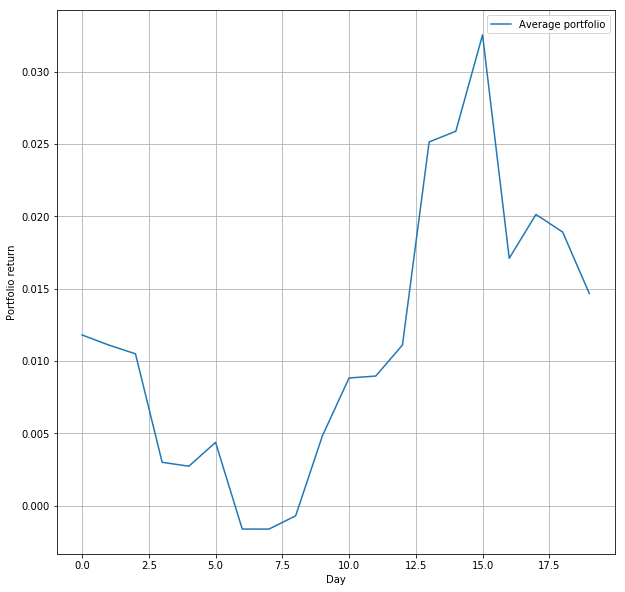

Probabilityof beating the portfolio target 0.02  19    0.0
dtype: float64


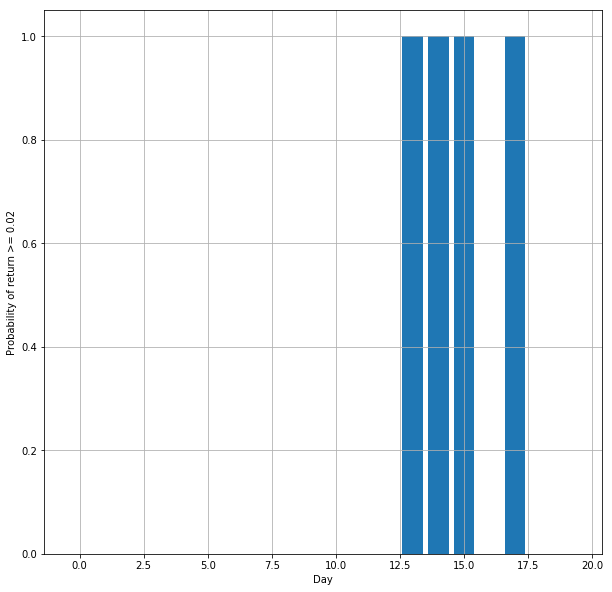

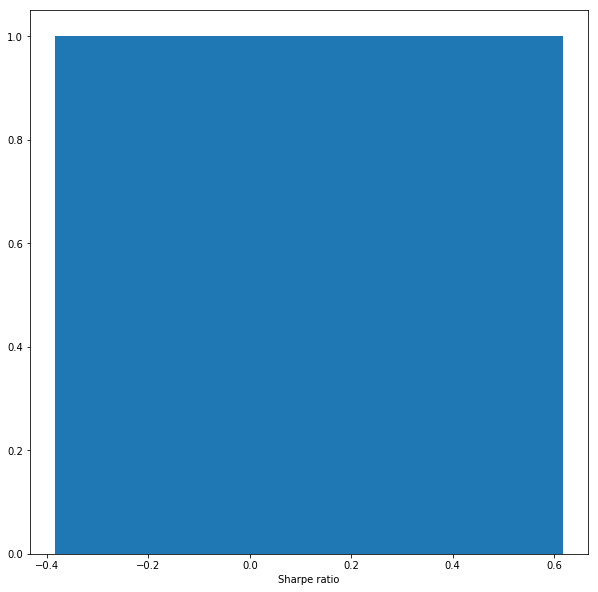

Sharpe ratio mean value 0.11691218753173847


In [16]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def _simulate_returns(historical_returns,forecast_days):
  return historical_returns.sample(n = forecast_days, 
                                   replace = True).reset_index(drop = True)


def simulate_modified_returns(
      historical_returns,
      forecast_days,
      correct_mean_by):
  h = historical_returns.copy()
  new_series = h + correct_mean_by
  return new_series.sample(n=forecast_days,  
     replace = True).reset_index(drop=True)


def simulate_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in tqdm(composition):
    name,weight = t[0],t[1]
    s = _simulate_returns(historical_returns['return_%s' % (name)], forecast_days)
    result = result + s * weight
  
  return(result)


def simulate_modified_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
    name,weight,correction = t[0],t[1],t[2]
    s = simulate_modified_returns(historical_returns['return_%s' % (name)], forecast_days,correction)
    result = result + s * weight
  
  return(result)




if __name__ == '__main__':
    portfolio_composition = [('MSFT',0.5),('AAPL',0.2),('GOOG',0.3)]
    returns = pd.DataFrame({})

    # create returns portfolio dataframe

    
    for t in portfolio_composition:
        name = t[0]
        ticker = yfinance.Ticker(name)
        data = ticker.history(interval="1d",start="2010-01-01",end="2019-12-31")
        data['return_%s' % (name)] = data['Close'].pct_change(1)
        returns = returns.join(data[['return_%s' % (name)]],how="outer").dropna()

    # Monte Carlo simulation of a portfolio

    
    # simulate_portfolio(returns,portfolio_composition,10)
    # This may be enough for portfolio simulation, but we want something more, that is the what-if analysis.

    # print("The historical average returns are  : \n", returns.mean(axis=0))
    
    '''
    If we perform portfolio simulation as shown before, 
    we are simply saying that the future returns are a random sample 
    of the past returns. We already know this isn’t completely true. 
    Moreover, maybe we are performing scenario analysis because 
    we want to know what happens if certain conditions will occur. 
    For example, what happens if the average daily return of each stock 
    is lower than its historical value?If we perform portfolio 
    simulation as shown before, we are simply saying that the future returns 
    are a random sample of the past returns. We already know this 
    isn’t completely true. Moreover, maybe we are performing scenario analysis 
    because we want to know what happens if certain conditions will occur. 
    For example, what happens if the average daily return of each 
    stock is lower than its historical value?
    '''

    print('Let’s try to simulate what happens if the average \
    returns drop by -0.0001 for MSFT, -0.001 for AAPL and -0.0005 for GOOG. \
    We must subtract these quantities from each stock and then simulate the  \
    future portfolios with the new, modified data.')



    # We’ll add these corrections directly to the portfolio_composition list (they are the third component of each tuple):

    new_portfolio_composition = [
   ('MSFT', 0.5,-0.0001), 
   ('AAPL', 0.2,-0.001), 
   ('GOOG', 0.3,-0.0005)
]

    # Simulations and results

    forecast_days = 20
    n_iterations = 200

    simulated_portfolios = simulation(returns,
    new_portfolio_composition,forecast_days,n_iterations)



    # Taken the daily returns of a portfolio, we can build the return after N days with the compound interest formula:

    percentile_5th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,5),axis=1)
    percentile_95th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,95),axis=1)
    average_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x),axis=1)
    print(percentile_5th.tail(1))
    print(percentile_95th.tail(1))
    print(average_port.tail(1))

    # Confidence interval for future portfolios
    x = range(forecast_days)

    plt.rcParams['figure.figsize'] = [10, 10]

    plt.plot(x,average_port,label="Average portfolio")
    plt.xlabel("Day")
    plt.ylabel("Portfolio return")


    plt.fill_between(x, percentile_5th, percentile_95th,alpha=0.2)
    plt.grid()
    plt.legend()

    plt.show()


    # Probability of beating the portfolio target

    target_return = 0.02
    target_prob_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x > target_return),axis=1)

    print("Probabilityof beating the portfolio target {} ".format(target_return),target_prob_port.tail(1))


    # The size of the error bars is calculated with the standard error formula:
    err_bars = np.sqrt(
    target_prob_port * (1-target_prob_port) / n_iterations
    )
    x = range(forecast_days)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.bar(x,target_prob_port,yerr = err_bars)
    plt.xlabel("Day")
    plt.ylabel("Probability of return >= %.2f" % (target_return))
    plt.grid()
    plt.show()



    # Sharpe ratio histogram
    '''
    performance metric of a portfolio
    '''

    sharpe_indices = simulated_portfolios.apply(lambda x : np.mean(x)/np.std(x))
    plt.hist(sharpe_indices,bins="rice")
    plt.xlabel("Sharpe ratio")
    plt.show()
    print("Sharpe ratio mean value",np.mean(sharpe_indices))

In [17]:
portfolio_composition = [('MSFT',0.5),('AAPL',0.2),('GOOG',0.3)]

returns = pd.DataFrame({})

In [18]:
for t in portfolio_composition:
  name = t[0]
  ticker = yfinance.Ticker(name)
  data = ticker.history(interval="1d",start="2010-01-01",end="2019-12-31")
  data['return_%s' % (name)] = data['Close'].pct_change(1)

  returns = returns.join(data[['return_%s' % (name)]],how="outer").dropna()

In [19]:
returns

,return_MSFT,return_AAPL,return_GOOG
Date,,,
2010-01-04,0.015507,0.015733,0.010912
2010-01-05,0.000000,0.001511,-0.004388
2010-01-06,-0.005778,-0.015843,-0.025223
2010-01-07,-0.010378,-0.001916,-0.023268
2010-01-08,0.006711,0.006912,0.013347
2010-01-11,-0.012917,-0.009153,-0.001534
2010-01-12,-0.006332,-0.011162,-0.017667
2010-01-13,0.009346,0.014013,-0.005746
2010-01-14,0.019781,-0.005758,0.004685


In [20]:
portfolio_composition = [('MSFT', 0.5,-0.0001), ('AAPL', 0.2,-0.001), ('GOOG', 0.3,-0.0005)]

In [21]:
forecast_days = 20
n_iterations = 200

In [22]:
simulated_portfolios = simulation(returns,portfolio_composition,forecast_days,n_iterations)

In [23]:
simulated_portfolios.head()

,returns_199
0,0.010139
1,-0.004802
2,0.001312
3,-0.007540
4,-0.016122


In [25]:
returns.mean(axis=0)
def simulation(historical_returns,composition,forecast_days,n_iterations):
  simulated_portfolios = None

  for i in range(n_iterations):
    sim = simulate_modified_portfolio(historical_returns,composition,forecast_days)

    sim_port = pd.DataFrame({'returns_%d' % (i) : sim})

    if simulated_portfolios is None:
      simulated_portfolios = sim_port
    else:
      simulated_portfolios = simulated_portfolios.join(sim_port)
    
  return simulated_portfolios

In [26]:
simulated_portfolios = simulation(returns,portfolio_composition,forecast_days,n_iterations)

In [27]:
simulated_portfolios.head()

,returns_0,returns_1,returns_2,returns_3,returns_4,returns_5,returns_6,returns_7,returns_8,returns_9,...,returns_190,returns_191,returns_192,returns_193,returns_194,returns_195,returns_196,returns_197,returns_198,returns_199
0,0.000073,0.011194,0.003819,0.008551,0.006982,0.011094,0.010786,0.002911,0.027941,-0.002636,...,0.000070,-0.020876,0.001936,-0.014286,0.005172,0.010883,0.014641,-0.008823,0.007721,-0.002828
1,0.001209,0.004284,0.000122,-0.021159,0.007578,0.007326,-0.000954,0.018004,0.004098,-0.001058,...,-0.007908,-0.003478,0.002756,0.002625,-0.019219,0.006044,-0.009612,-0.003761,0.006715,-0.015921
2,0.002089,0.001067,-0.002486,0.003818,-0.002082,-0.013627,-0.003791,0.003092,-0.000405,-0.006175,...,-0.004091,-0.002375,0.021061,0.020987,0.002648,0.004870,-0.001301,-0.001375,-0.012419,0.003164
3,0.012369,-0.012042,-0.011254,-0.003561,0.006068,-0.013098,0.002213,-0.002103,0.009221,-0.005161,...,0.008376,-0.005049,-0.003316,0.000530,0.001929,-0.006307,0.023261,-0.008309,-0.005083,-0.000742
4,0.000540,0.000477,0.003390,0.003693,-0.007570,0.001453,-0.009481,0.005625,-0.000300,0.000579,...,0.001244,-0.009140,-0.011440,-0.055313,-0.011891,0.000286,-0.003238,0.004339,0.001458,-0.001570
